<a href="https://colab.research.google.com/github/tiwari0809/Guvi_task/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Social_Network_Ads.csv

**Import libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [32]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [33]:
from sklearn.model_selection import train_test_split
x = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

**Feature Scaling**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Fitting SVM to the Training set**

In [35]:
from sklearn import svm

#Create a svm Classifier
#clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

**Predicting the Test set results**

In [36]:
predict=clf.predict(x_test)
predict

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [37]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predict))

Train set Accuracy:  0.8208333333333333
Test set Accuracy:  0.8375


**Making the Confusion Matrix**

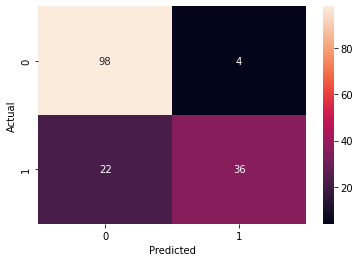

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)
confusion_matrix = pd.crosstab(y_test, predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

In [39]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, f1_score
f1_score(y_test,y_pred)

0.7346938775510204

**Visualising the Test set results**

In [44]:
print('ROC test', roc_auc_score(y_test, y_pred))

ROC test 0.7907369844489519


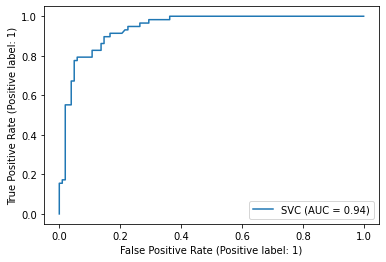

In [47]:
RocCurveDisplay.from_estimator(clf,x_test,y_test)